In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import glob

from fastparquet import ParquetFile

# visualization packages
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import squarify
from pygal import Treemap as tm
from pygal.style import Style as pgstyle

from jupyterthemes import jtplot
jtplot.style()

# Load Data
---

In [2]:
filelist = glob.glob('instacart_store_info.parquet/*.parquet')
pf = ParquetFile(filelist)
df_store = pf.to_pandas()
df_store.head()

,product_id,product_name,aisle_id,aisle,department_id,department
0,1,Chocolate Sandwich Cookies,61,cookies cakes,19,snacks
1,2,All-Seasons Salt,104,spices seasonings,13,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,tea,7,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,frozen meals,1,frozen
4,5,Green Chile Anytime Sauce,5,marinades meat preparation,13,pantry


In [3]:
df_store[df_store.department_id.isin([4,10])].sort_values(by=['department_id'])

,product_id,product_name,aisle_id,aisle,department_id,department
30,31,White Pearl Onions,123,packaged vegetables fruits,4,produce
32849,32851,Organic Carrots Baby Peeled Prepacked,123,packaged vegetables fruits,4,produce
32825,32827,Red Chard Greens Bunch,83,fresh vegetables,4,produce
32767,32769,Organic Biologique Broccoli Florets,123,packaged vegetables fruits,4,produce
32766,32768,"Carrots, Bag",123,packaged vegetables fruits,4,produce
...,...,...,...,...,...,...
22258,22260,Organic Rolled Oats,68,bulk grains rice dried goods,10,bulk
48776,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,bulk dried fruits vegetables,10,bulk
999,1000,Apricots,18,bulk dried fruits vegetables,10,bulk
38611,38613,Large Ataulfo Mango,68,bulk grains rice dried goods,10,bulk


In [4]:
filelist = glob.glob('instacart_order_info.parquet/*.parquet')
pf = ParquetFile(filelist)
df_orders = pf.to_pandas()
df_orders.head()

,order_id,product_id,product_name,department_id,department,add_to_cart_order,reordered
0,2,33120,Organic Egg Whites,16.0,dairy eggs,1,1
1,2,28985,Michigan Organic Kale,4.0,produce,2,1
2,2,9327,Garlic Powder,13.0,pantry,3,0
3,2,45918,Coconut Butter,13.0,pantry,4,1
4,2,30035,Natural Sweetener,13.0,pantry,5,0


In [5]:
filelist = glob.glob('instacart_order_pivot.parquet/*.parquet')
pf = ParquetFile(filelist)
df_orders_pvt = pf.to_pandas()
df_orders_pvt = df_orders_pvt.sort_values(by=['user_id','order_number'])# TODO do in PySpark
df_orders_pvt.tail()

,order_id,user_id,eval_set,order_number,order_dow,order_hour,d1,d2,d3,d4,...,d15,d16,d17,d18,d19,d20,d21,days_elapsed,reord1,num_items
3346718,2266710,206209,prior,10,5,18,1,0,1,1,...,0,1,1,0,1,0,0,29.0,3,9
1753600,1854736,206209,prior,11,4,10,0,0,1,1,...,0,2,1,0,1,1,0,30.0,6,8
2224894,626363,206209,prior,12,1,12,0,0,2,5,...,0,4,3,0,1,1,0,18.0,14,20
1451777,2977660,206209,prior,13,1,12,0,0,0,1,...,0,2,0,0,4,0,0,7.0,4,9
549395,272231,206209,train,14,6,14,1,0,1,1,...,0,1,1,0,1,0,0,30.0,4,8


In [6]:
df_orders_pvt[df_orders_pvt.days_elapsed==0].count()

order_id        273964
user_id         273964
eval_set        273964
order_number    273964
order_dow       273964
order_hour      273964
d1              273964
d2              273964
d3              273964
d4              273964
d5              273964
d6              273964
d7              273964
d8              273964
d9              273964
d10             273964
d11             273964
d12             273964
d13             273964
d14             273964
d15             273964
d16             273964
d17             273964
d18             273964
d19             273964
d20             273964
d21             273964
days_elapsed    273964
reord1          273964
num_items       273964
dtype: int64

# Visualize Data
---

## Store Statistics

### Department Size

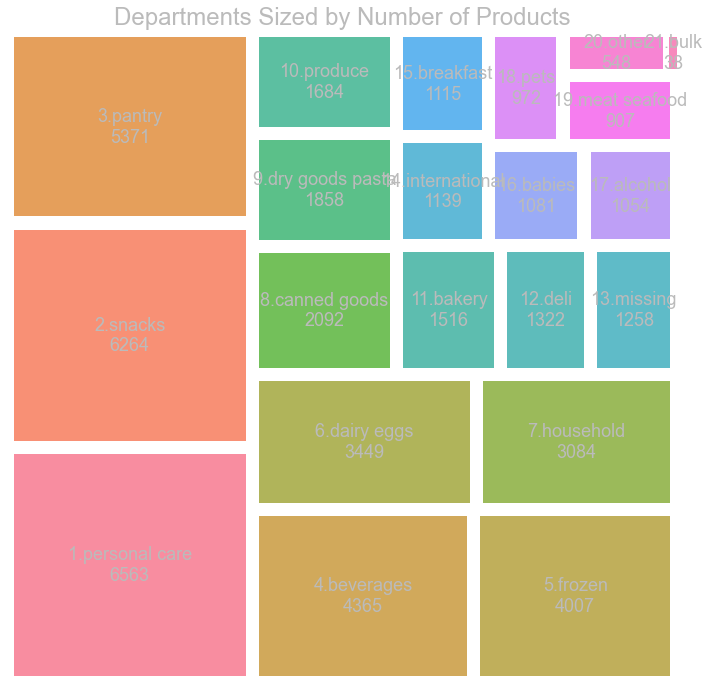

In [7]:
# set figure parameters
plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['font.size'] = 18

# define data to plot
my_data = df_store.department.value_counts().reset_index()
my_data.columns = ['dept', 'prod_count']
my_data['ranking'] = my_data.index + 1
my_data['label'] = my_data.ranking.astype(str) + '.' + my_data.dept + '\n' + my_data.prod_count.astype(str)

# plot treemap
square_colors = sns.husl_palette(21)
squarify.plot(sizes=my_data.prod_count, label=my_data.label, color=square_colors, alpha=0.8, pad=True)

# plot labeling options
plt.title('Departments Sized by Number of Products', fontsize=24)
plt.axis('off')
plt.show()

### Aisle Size

In [8]:
df_store.head()

df_store[df_store.aisle=='missing']

,product_id,product_name,aisle_id,aisle,department_id,department
37,38,Ultra Antibacterial Dish Liquid,100,missing,21,missing
71,72,Organic Honeycrisp Apples,100,missing,21,missing
109,110,Uncured Turkey Bologna,100,missing,21,missing
296,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,missing,21,missing
416,417,Classics Baby Binks Easter Chocolate Bunny,100,missing,21,missing
...,...,...,...,...,...,...
49551,49553,Organic Plain Skyr,100,missing,21,missing
49573,49575,Chocolate Vanilla Malt Custard,100,missing,21,missing
49639,49641,"""8"""" Pecan Pie""",100,missing,21,missing
49662,49664,Lemon Cayenne Drinking Vinegar,100,missing,21,missing


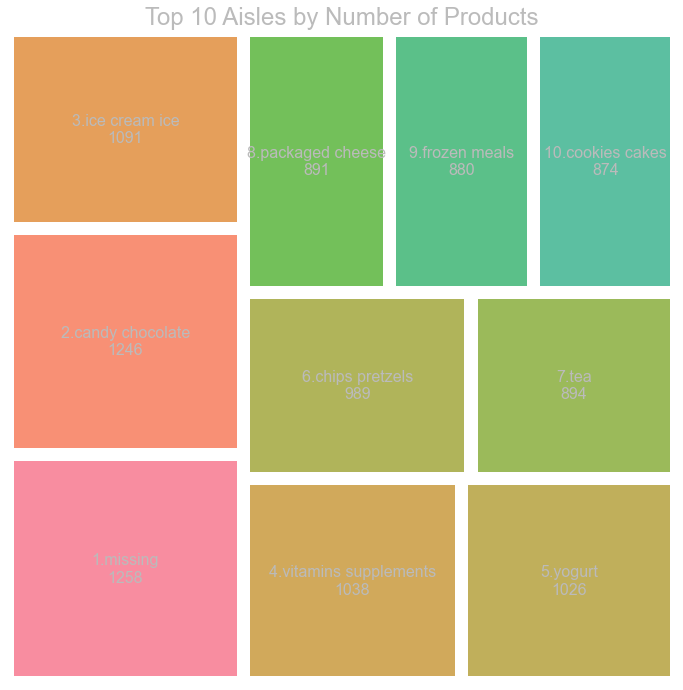

In [9]:
# set figure parameters
plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['font.size'] = 16

# define data to plot
my_data = df_store.aisle.value_counts().reset_index()
my_data.columns = ['aisle', 'prod_count']
my_data['ranking'] = my_data.index + 1
my_data['label'] = my_data.ranking.astype(str) + '.' + my_data.aisle + '\n' + my_data.prod_count.astype(str)
my_data = my_data.head(10)

# plot treemap
square_colors = sns.husl_palette(21)
squarify.plot(sizes=my_data.prod_count, label=my_data.label, color=square_colors, alpha=0.8, pad=True)

# plot labeling options
plt.title('Top 10 Aisles by Number of Products', fontsize=24)
plt.axis('off')
plt.show()

## Order Statistics

In [10]:
df_orders.head()

,order_id,product_id,product_name,department_id,department,add_to_cart_order,reordered
0,2,33120,Organic Egg Whites,16.0,dairy eggs,1,1
1,2,28985,Michigan Organic Kale,4.0,produce,2,1
2,2,9327,Garlic Powder,13.0,pantry,3,0
3,2,45918,Coconut Butter,13.0,pantry,4,1
4,2,30035,Natural Sweetener,13.0,pantry,5,0


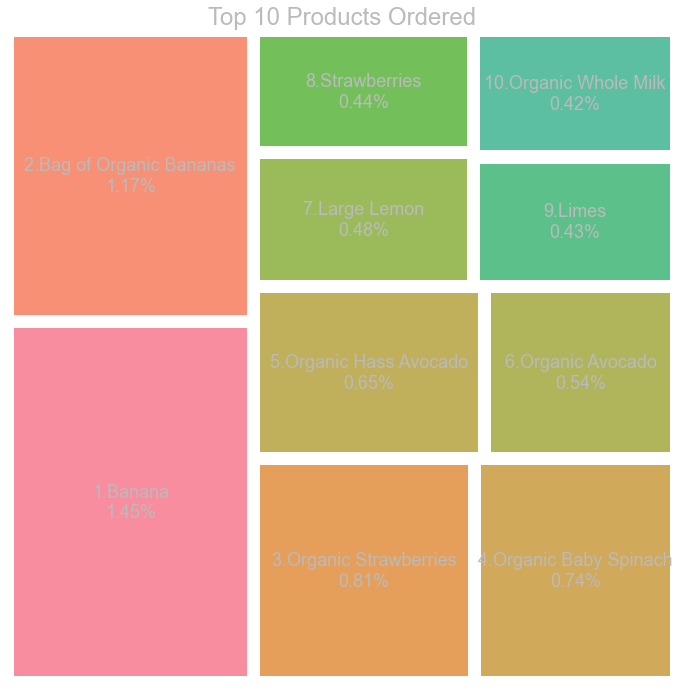

In [11]:
# set figure parameters
plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['font.size'] = 18

# define data to plot
my_data = df_orders.product_name.value_counts(normalize=True).reset_index()
my_data.columns = ['product_name', 'order_count']
my_data.order_count = my_data.order_count * 100
my_data.order_count = my_data.order_count.round(2)
my_data['ranking'] = my_data.index + 1
my_data['label'] = my_data.ranking.astype(str) + '.' + my_data.product_name + '\n' + my_data.order_count.astype(str) + '%'
my_data = my_data.head(10)

# plot treemap
square_colors = sns.husl_palette(21)
squarify.plot(sizes=my_data.order_count, label=my_data.label, color=square_colors, alpha=0.8, pad=True)

# plot labeling options
plt.title('Top 10 Products Ordered', fontsize=24)
plt.axis('off')
plt.show()


In [12]:
df_orders[df_orders.department=='produce'].product_name.value_counts().reset_index().iloc[0]['index']

'Banana'

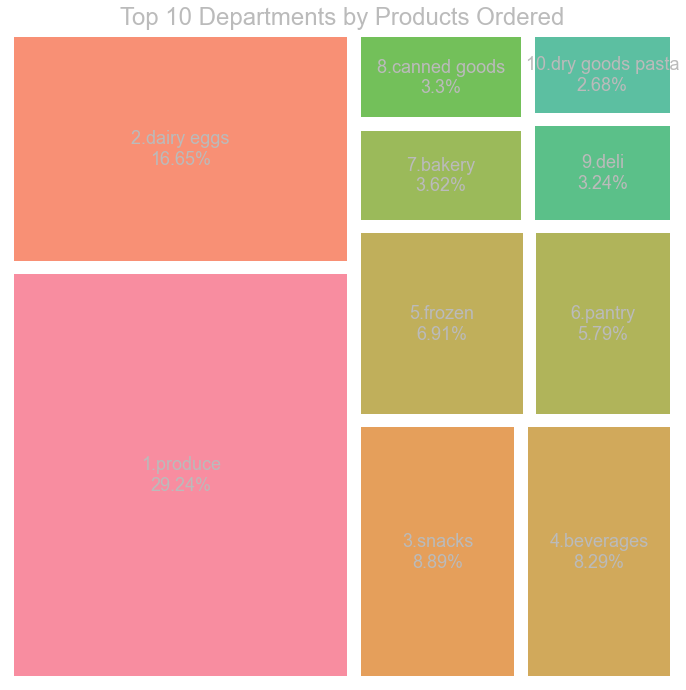

In [13]:
# set figure parameters
plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['font.size'] = 18

# define data to plot
my_data = df_orders.department.value_counts(normalize=True).reset_index()
my_data.columns = ['department', 'order_count']
my_data.order_count = my_data.order_count * 100
my_data.order_count = my_data.order_count.round(2)
my_data['ranking'] = my_data.index + 1


def top_products_per_dept(x):
    #return ', '.join(list(df_orders[df_orders.department==x].product_name.value_counts().reset_index().iloc[:3]['index'].values))
    return df_orders[df_orders.department==x].product_name.value_counts().reset_index().iloc[0]['index']

#my_data['top_products'] = my_data.department.apply(top_products_per_dept)

my_data['label'] = my_data.ranking.astype(str) + '.' + my_data.department + '\n' + my_data.order_count.astype(str) + '%'# + '\n' + my_data.top_products
my_data = my_data.head(10)

# plot treemap
square_colors = sns.husl_palette(21)
squarify.plot(sizes=my_data.order_count, label=my_data.label, color=square_colors, alpha=0.8, pad=True)

# plot labeling options
plt.title('Top 10 Departments by Products Ordered', fontsize=24)
plt.axis('off')
plt.show()


## Order Pivot Statistics

In [14]:
df_orders_pvt.describe()

,order_id,user_id,order_number,order_dow,order_hour,d1,d2,d3,d4,d5,...,d15,d16,d17,d18,d19,d20,d21,days_elapsed,reord1,num_items
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,...,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06
mean,1.673061e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,6.830755e-01,1.113273e-02,3.581267e-01,2.890423e+00,4.656245e-02,...,3.258784e-01,1.645990e+00,2.264339e-01,1.282468e-01,8.787896e-01,3.202319e-01,2.262325e-02,1.046162e+01,5.833053e+00,9.885496e+00
std,1.008298e+06,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,1.246488e+00,1.088338e-01,6.876537e-01,3.183835e+00,3.710464e-01,...,7.851945e-01,1.892800e+00,6.958604e-01,7.754567e-01,1.529503e+00,6.760810e-01,1.749753e-01,9.296047e+00,5.847892e+00,7.604601e+00
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.977525e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00
50%,1.672230e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,4.000000e+00,8.000000e+00
75%,2.546710e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,8.000000e+00,1.300000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.300000e+01,6.000000e+00,1.400000e+01,5.100000e+01,4.000000e+01,...,2.300000e+01,4.800000e+01,4.800000e+01,6.000000e+01,7.600000e+01,1.600000e+01,9.000000e+00,3.000000e+01,1.300000e+02,1.450000e+02


## number of items ordered

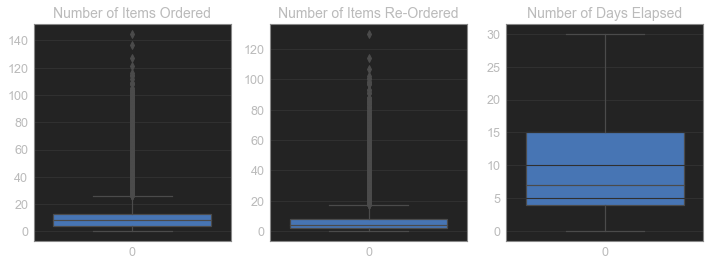

In [15]:
# set figure parameters
plt.rcParams['figure.figsize'] = (12,4)

# plot boxplots

plt.subplot(1,3,1)
sns.boxplot(data=df_orders_pvt.num_items)
plt.title('Number of Items Ordered', fontsize=14)

plt.subplot(1,3,2)
sns.boxplot(data=df_orders_pvt.reord1)
plt.title('Number of Items Re-Ordered', fontsize=14)

plt.subplot(1,3,3)
sns.boxplot(data=df_orders_pvt.days_elapsed)
plt.title('Number of Days Elapsed', fontsize=14)


plt.show()

In [16]:
q25, q75 = np.percentile(df_orders_pvt.num_items, [25,75])
iqr = q75-q25

maxlim = q75 + 1.5*iqr
minlim = q25 - 1.5*iqr

print(maxlim,minlim)

26.5 -9.5


In [17]:
outliers = df_orders_pvt[df_orders_pvt.num_items > maxlim].index.to_list()
df_orders_pvt.drop(outliers, inplace=True)
len(df_orders_pvt)

3292455

### Orders by Day of Week

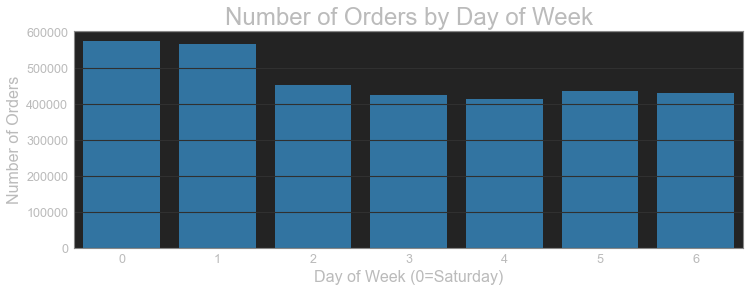

In [18]:
# set figure parameters
plt.rcParams['figure.figsize'] = (12,4)

# plot countplot
sns.countplot(data=df_orders_pvt, x='order_dow', color='tab:blue')#palette='husl')

# plot labeling options
plt.title('Number of Orders by Day of Week', fontsize=24)
plt.xlabel('Day of Week (0=Saturday)', fontsize=16)
plt.ylabel('Number of Orders', fontsize=16)

plt.show()

- The most popular days of the week to shop via Instacart are during the weekends.
- The least popular day is Wednesday, right in the middle of the workweek.

### Orders by Hour of Day

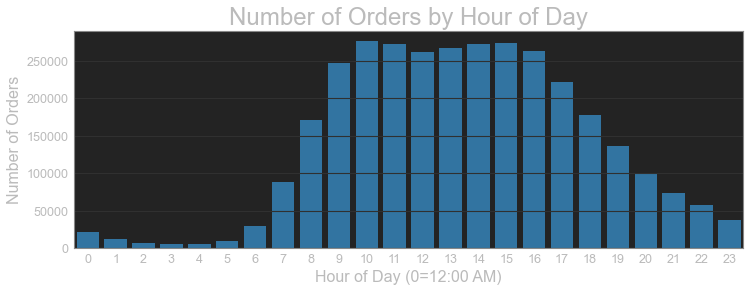

In [19]:
# set figure parameters
plt.rcParams['figure.figsize'] = (12,4)

# plot countplot
sns.countplot(data=df_orders_pvt, x='order_hour', color='tab:blue')#palette='husl')

# plot labeling options
plt.title('Number of Orders by Hour of Day', fontsize=24)
plt.xlabel('Hour of Day (0=12:00 AM)', fontsize=16)
plt.ylabel('Number of Orders', fontsize=16)

plt.show()

- The peak order times are between 10:00 AM and 04:00 PM.
- The dead times are between midnight and 06:00 AM.

### Orders by Days Elapsed SInce Previous Order

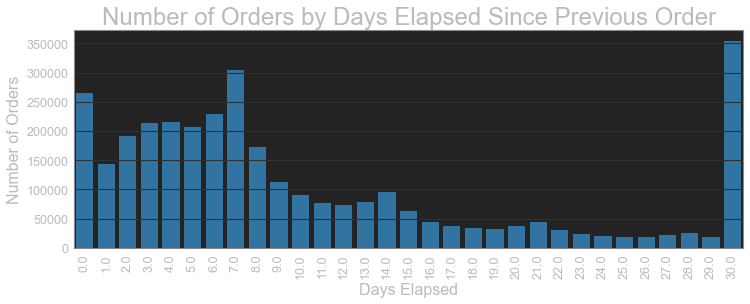

In [20]:
# set figure parameters
plt.rcParams['figure.figsize'] = (12,4)

# plot countplot
sns.countplot(data=df_orders_pvt, x='days_elapsed', color='tab:blue')

# plot labeling options
plt.title('Number of Orders by Days Elapsed Since Previous Order', fontsize=24)
plt.xlabel('Days Elapsed', fontsize=16)
plt.ylabel('Number of Orders', fontsize=16)
plt.xticks(rotation='vertical')

plt.show()

### Orders by Order Number

In [21]:
min_num_orders = df_orders_pvt.groupby('user_id').aggregate('last').order_number.min()
max_num_orders = df_orders_pvt.groupby('user_id').aggregate('last').order_number.max()

print(f'--- number of orders with minimum order number of {min_num_orders} ---')
print(df_orders_pvt[df_orders_pvt.order_number==min_num_orders].count().order_number)
print(f'--- number of orders with maximum order number of {max_num_orders} ---')
print(df_orders_pvt[df_orders_pvt.order_number==max_num_orders].count().order_number)

--- number of orders with minimum order number of 1 ---
198681
--- number of orders with maximum order number of 100 ---
1356


In [22]:
df_orders_pvt.groupby('order_number').aggregate('count').order_id.sort_values(ascending=False)

order_number
3      198985
2      198946
4      198933
1      198681
5      175700
        ...  
96       1554
97       1476
98       1438
99       1384
100      1356
Name: order_id, Length: 100, dtype: int64

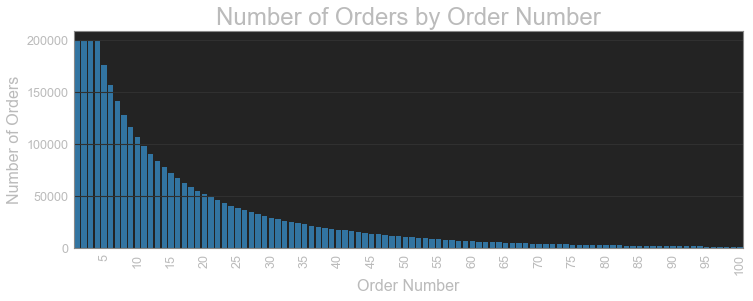

In [23]:
# set figure parameters
plt.rcParams['figure.figsize'] = (12,4)

# plot countplot
plot_ = sns.countplot(data=df_orders_pvt, x='order_number', color='tab:blue')

# adjust xtick labels
for index, label in enumerate(plot_.get_xticklabels()):
    if not (index+1) % 5:
        label.set_visible(True)
    else:
        label.set_visible(False)

# plot labeling options
plt.title('Number of Orders by Order Number', fontsize=24)
plt.xlabel('Order Number', fontsize=16)
plt.xticks(rotation='vertical')
plt.ylabel('Number of Orders', fontsize=16)

plt.show()

- Order Number denotes which order (1st, 2nd, 3rd, ..., etc) it is for the customer in the dataset.
- Users ordered between 4 and 100 times from Instacart in the dataset.
- After 4 orders, the number of orders decreases gradually.

In [24]:
df_tmp = pd.DataFrame(df_orders_pvt.groupby('order_number').aggregate('count').order_id).reset_index()
df_tmp.columns = ['order_number','order_count']
df_tmp['cum_sum'] = df_tmp.order_count.cumsum()
df_tmp['cum_perc'] = 100*df_tmp.cum_sum/df_tmp.order_count.sum()
pd.set_option('display.max_rows', 100)
df_tmp

,order_number,order_count,cum_sum,cum_perc
0,1,198681,198681,6.034433
1,2,198946,397627,12.076915
2,3,198985,596612,18.120582
3,4,198933,795545,24.162669
4,5,175700,971245,29.499112
5,6,156676,1127921,34.257750
6,7,141079,1269000,38.542668
7,8,127632,1396632,42.419167
8,9,116339,1512971,45.952671
9,10,106512,1619483,49.187703


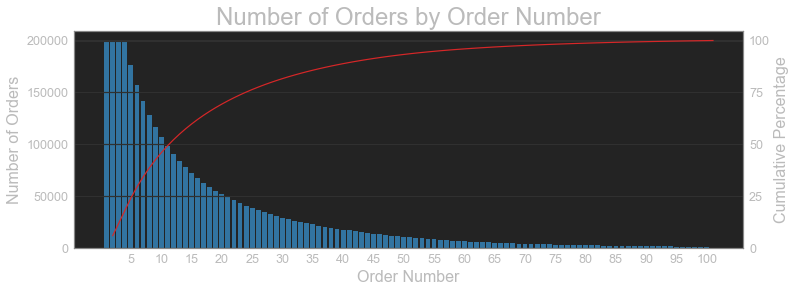

In [25]:
# set figure parameters
plt.rcParams['figure.figsize'] = (12,4)

# plot countplot
ax1 = sns.barplot(df_tmp.order_number, df_tmp.order_count, color='tab:blue')

# adjust xtick labels
for index, label in enumerate(ax1.get_xticklabels()):
    if not (index+1) % 5:
        label.set_visible(True)
    else:
        label.set_visible(False)

# plot labeling options
plt.xlabel('Order Number', fontsize=16)
plt.yticks(np.arange(0,250000, 50000))
plt.ylabel('Number of Orders', fontsize=16)

# plot second axis
ax2 = ax1.twinx()
sns.lineplot(df_tmp.order_number, df_tmp.cum_perc, ax=ax2, color='tab:red')

# add vertical lines, marking quantiles
#plt.axvline(4, color='red')
#plt.axvline(10, color='yellow')
#plt.axvline(23, color='green')

# plot labeling options
plt.title('Number of Orders by Order Number', fontsize=24)
plt.ylabel('Cumulative Percentage', fontsize=16)
plt.yticks(np.arange(0,125,25))

plt.show()

### Orders by Number of Items Ordered

In [26]:
# calculate number of orders per num_items value
df_orders_pvt.groupby('num_items').aggregate('count').order_id.sort_values(ascending=False)

num_items
5     237224
6     236383
4     230300
7     228548
3     215060
8     211357
2     194361
9     191563
10    172103
1     163593
11    153495
12    136963
13    121714
14    108077
15     95475
16     84714
0      75000
17     74468
18     65348
19     57290
20     50198
21     43720
22     38049
23     33134
24     28357
25     24692
26     21269
Name: order_id, dtype: int64

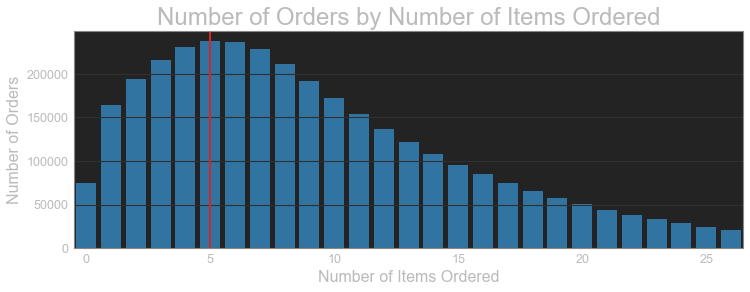

In [27]:
# set figure parameters
plt.rcParams['figure.figsize'] = (12,4)

# plot countplot
plot_ = sns.countplot(data=df_orders_pvt, x='num_items', color='tab:blue')

# adjust xtick labels
for index, label in enumerate(plot_.get_xticklabels()):
    if not (index) % 5:
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.axvline(5, color='tab:red', linewidth=2.0, label='peak')       

# plot labeling options
plt.title('Number of Orders by Number of Items Ordered', fontsize=24)
plt.xlabel('Number of Items Ordered', fontsize=16)
#plt.xticks(rotation='vertical')
plt.ylabel('Number of Orders', fontsize=16)

plt.show()

- The number of orders peaks at 5 items ordered.
- The distribution appears to be somewhat Gaussian in nature, centered at 5 items, though obviously there cannot be a negative number of items.

### Orders by Number of Items Re-Ordered

In [28]:
# calculate number of orders per num_items value
df_orders_pvt.groupby('reord1').aggregate('count').order_id.sort_values(ascending=False)

reord1
0     464179
2     344717
1     342809
3     324747
4     292491
5     255525
6     219088
7     185798
8     156335
9     129775
10    108058
11     89876
12     74697
13     61936
14     51605
15     42156
16     34721
17     27994
18     22547
19     17977
20     14074
21     10739
22      7974
23      5660
24      3739
25      2234
26      1004
Name: order_id, dtype: int64

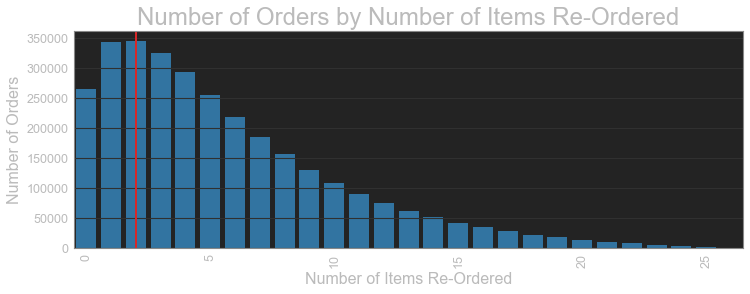

In [29]:
# set figure parameters
plt.rcParams['figure.figsize'] = (12,4)

# filter data to exclude 1st orders
my_data = df_orders_pvt[df_orders_pvt.order_number>1]

# plot countplot
plot_ = sns.countplot(data=my_data, x='reord1', color='tab:blue')

# adjust xtick labels
for index, label in enumerate(plot_.get_xticklabels()):
    if not (index) % 5:
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.axvline(2, color='tab:red', linewidth=2.0, label='peak')    
        
# plot labeling options
plt.title('Number of Orders by Number of Items Re-Ordered', fontsize=24)
plt.xlabel('Number of Items Re-Ordered', fontsize=16)
plt.xticks(rotation='vertical')
plt.ylabel('Number of Orders', fontsize=16)

plt.show()

- The number of orders peaks at 2 items re-ordered, though 1 item re-ordered is close behind.
- Again, the distribution appears similar to a (one-sided) Gaussian.

In [30]:
df_orders_pvt.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour,d1,d2,d3,d4,...,d15,d16,d17,d18,d19,d20,d21,days_elapsed,reord1,num_items
2132290,2539329,1,prior,1,2,8,0,0,0,0,...,0,1,1,0,2,0,0,0.0,0,5
3193189,2398795,1,prior,2,3,7,0,0,0,1,...,0,0,0,0,3,0,0,15.0,3,6
345225,473747,1,prior,3,3,12,0,0,0,0,...,0,1,0,0,2,0,0,21.0,3,5
1396792,2254736,1,prior,4,4,7,0,0,0,0,...,0,1,1,0,2,0,0,29.0,5,5
2190008,431534,1,prior,5,4,15,0,0,0,4,...,0,1,0,0,2,0,0,28.0,5,8


### Number of Items Re-Ordered vs. Number of Total Items Ordered

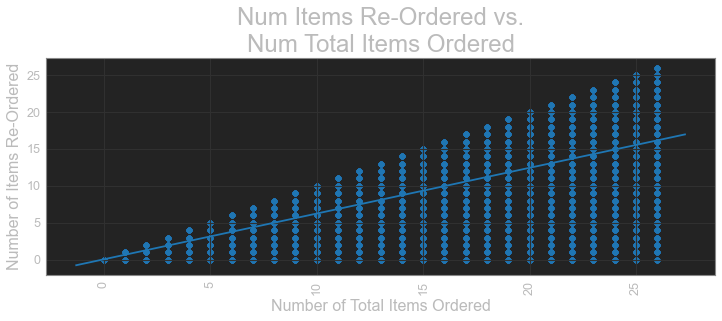

In [31]:
# set figure parameters
plt.rcParams['figure.figsize'] = (12,4)

# filter data to exclude 1st orders
# sample data (w/no replacement and random_state not set) to reduce compute time
my_data = df_orders_pvt[df_orders_pvt.order_number > 1].sample(frac=0.25)

# plot regplot
plot_ = sns.regplot(data=my_data, x='num_items', y='reord1', color='tab:blue')
      
# plot labeling options
plt.title('Num Items Re-Ordered vs.\nNum Total Items Ordered', fontsize=24)
plt.xlabel('Number of Total Items Ordered', fontsize=16)
plt.xticks(rotation='vertical')
plt.ylabel('Number of Items Re-Ordered', fontsize=16)

plt.show()

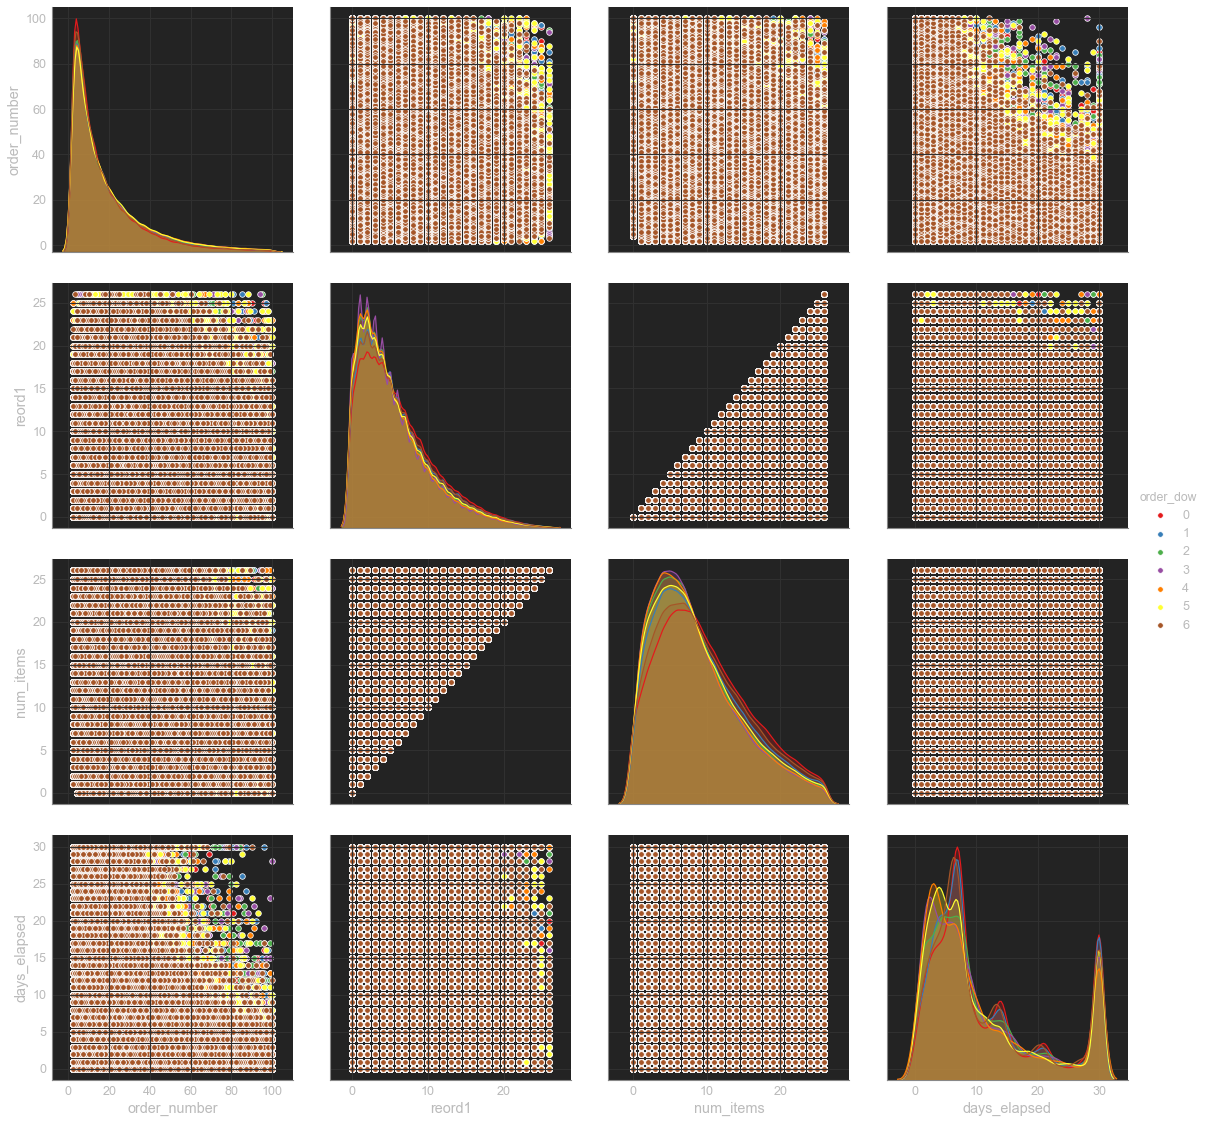

In [32]:
# set figure parameters
plt.rcParams['figure.figsize'] = (12,4)

# sample data (w/no replacement and random_state not set) to reduce compute time
my_data = df_orders_pvt[df_orders_pvt.order_number > 1].sample(frac=0.25)

# plot regplot
plot_ = sns.pairplot(data=my_data, vars=['order_number','reord1','num_items','days_elapsed'], hue='order_dow', palette='Set1', height=4)

plt.show()

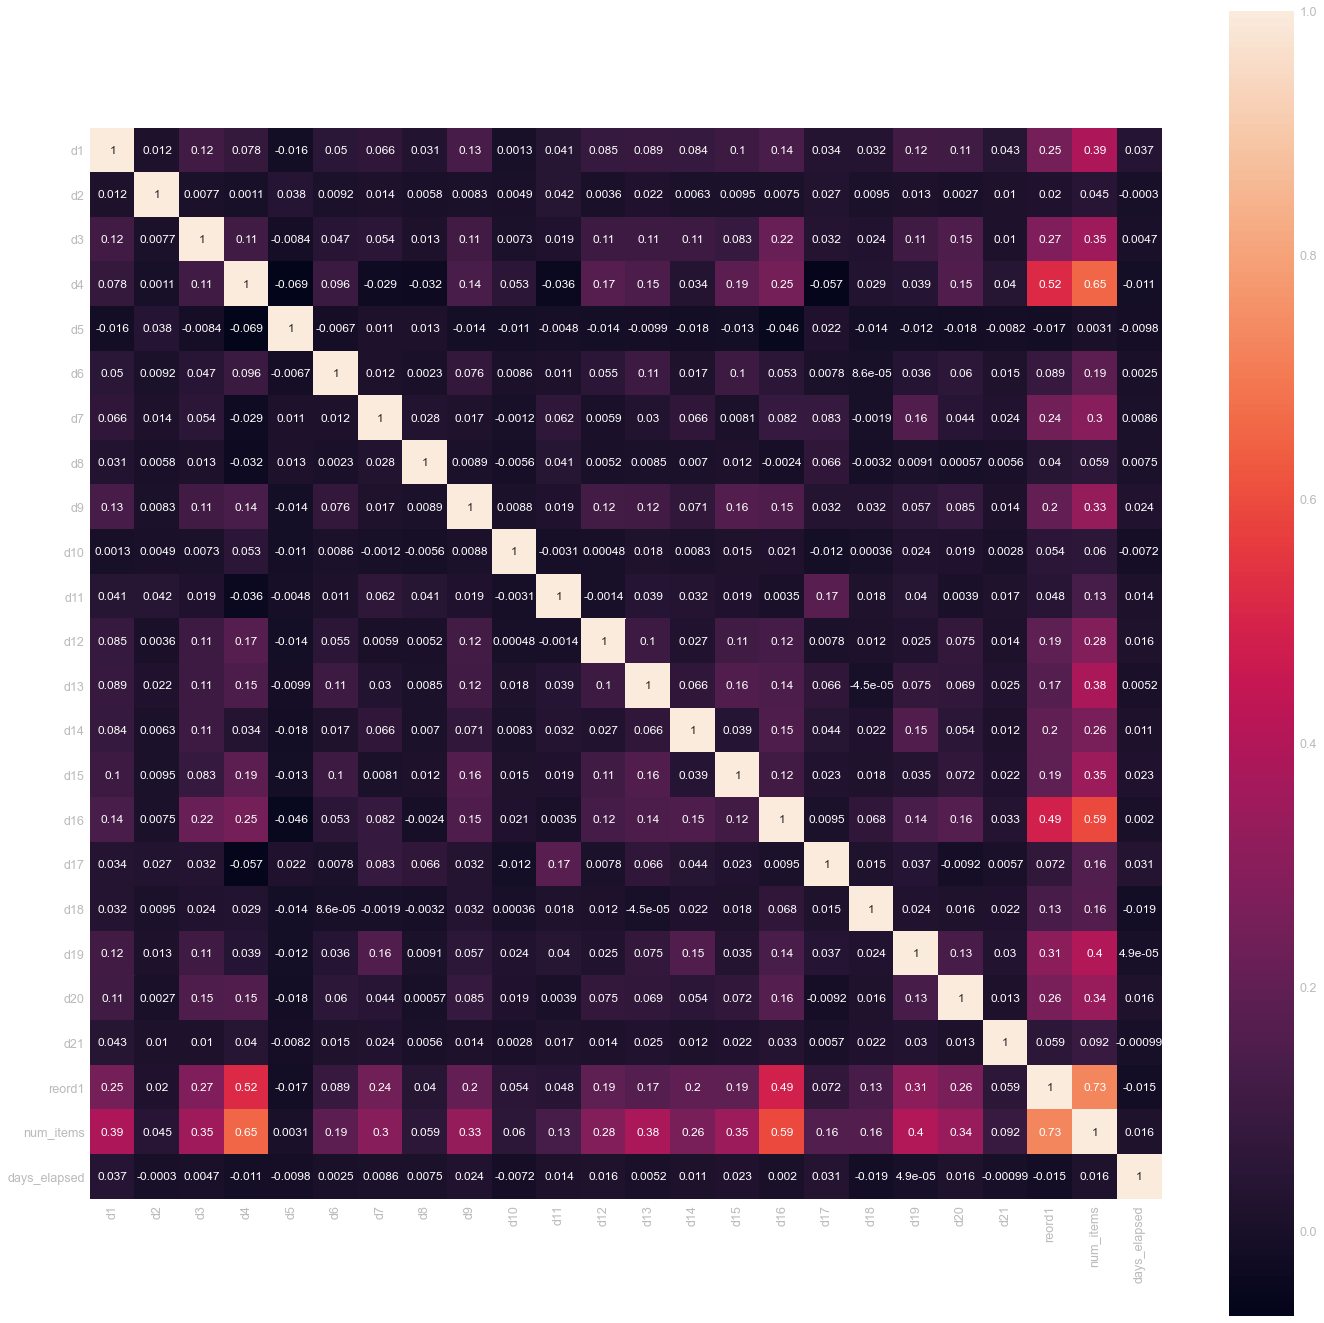

In [33]:
plt.rcParams['figure.figsize'] = (24,24)
plt.rcParams['font.size'] = 12
my_data = df_orders_pvt[df_orders_pvt.loc[:, 'd1':'d21'].columns.to_list() + ['reord1','num_items','days_elapsed']].sample(frac=0.25)
sns.heatmap(my_data.corr(), annot=True, square=True)
plt.show()

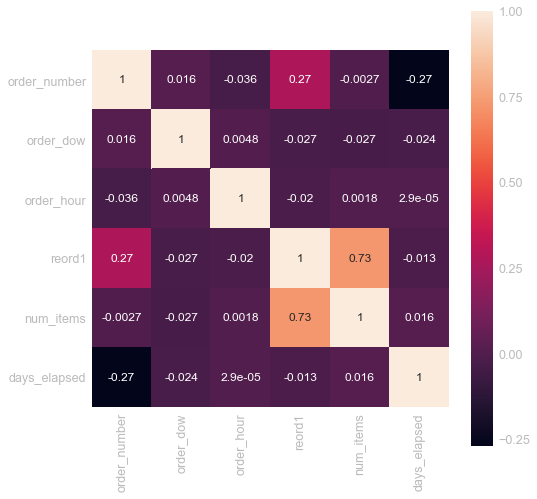

In [34]:
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['font.size'] = 12
my_data = df_orders_pvt[['order_number','order_dow','order_hour','reord1','num_items','days_elapsed']].sample(frac=0.25)
sns.heatmap(my_data.corr(), annot=True, square=True)
plt.show()

In [35]:
#df_orders_pvt.to_csv('instacart_order_pivot.csv',index=False)